<a href="https://colab.research.google.com/github/silviaaax/datastories_for_emme/blob/main/Homework7_Silvia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

•Να ξεκινήσετε από ένα νέο κενό notebook στο colab

•Να κατεβάσετε άρθρα που δημοσιεύτηκαν μια ολόκληρη ημέρα από ένα ειδησεογραφικό site (κατά προτίμηση όχι από τo efsyn.gr)

•Να φτιάξετε ένα barchart του πλήθους των άρθρων ανά ώρα

•Να φτιάξετε ένα συννεφόλεξο από τα ενωμένα κείμενα των τίτλων και των συνόψεων των άρθρων εκείνης της ημέρας

+μια δημοσιογραφική παράγραφο 100/150 λέξεις

In [129]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy

In [130]:
avgi_url = 'https://www.avgi.gr/'

In [131]:
response = requests.get(avgi_url)
soup = BeautifulSoup(response.text, 'html.parser')

In [132]:
articles = soup.find('main', {'class': "container container--main"}).find_all('article')

In [170]:
sp_articles= [] 
current_datetime = datetime.now()
current_day = current_datetime.day
for article in articles :
  
  article_dict = {}
  try:
    title = article.find('h4' , {'class' : "double-title"}).text
    article_dict['title'] = title    
  except:
    article_dict['title'] = ''
    pass

  try:
    summary = article.find('div', {'class': "teaser-summary"}).text
    article_dict['summary'] = summary   
  except:
    article_dict['summary'] = ''
    pass

  try:
    date = article.find('time').text
    article_dict['date'] = date
    if date.startswith(str(current_day)):
      article_dict['is_today'] = True
    else:
      article_dict['is_today'] = False  
  except:
    article_dict['date'] = ''
    article_dict['is_today'] = False
    pass
  sp_articles.append(article_dict)
avgi_df  = pd.DataFrame(sp_articles)

#ενταξει εδω αρχισα να μπερδευομαι γτ αρχικα εμφανιζε πολλα dates απο διαφορετικες ημερομηνιες αλλα εν τελη δεν μου εμφανιζε κανενα απο αυτα τα dates στο df
#δλδ οτι και να εκανα στον αρχικο απλο κωδικα ειτε με το find time ειτε με div class deafault-cat-date οπως στο html της αυγης στο df τα dates ηταν ολα κενα 
#και μετα προσπαθησα να εμφανιζει την τωρινη ημερομηνια/σημερινη μερα καθε φορα μεσα στην λουπα
#αλλα ουτε αυτο καταφερα και γενικα δεν μου λειτουργει τιποτα σχετικα με την ημερομηνια δεν ξερω αν εχει να κανει με το html της σελιδας ή αν μου εχει διαφυγει κατι
#εγκαταλειπω εδω γιατι δεν βγαινει και εχω ξεμεινει απο λυσεις

In [171]:
avgi_df

,title,summary,date,is_today
0,,«Δεν είμαστε κόμμα διαμαρτυρίας και κόμμα συμ...,30.05.23 20:32,False
1,,«Η αλαζονεία πλέον ξεχειλίζει στη Νέα Δημοκρα...,30.05.23 22:15,False
2,,Οι κυβερνοεπιθέσεις σύμφωνα με τον Κυριάκο Μη...,30.05.23 21:49,False
3,,«Ο Σκέρτσος προσπαθεί περίπου να καταστήσει τ...,30.05.23 19:18,False
4,,Η κυβερνόεπίθεση στην Τράπεζα Θεμάτων θα μπορ...,30.05.23 22:10,False
...,...,...,...,...
96,Μίλτος Πασχαλίδης / Μεγάλος διαγωνισμός με δι...,Κερδίστε διπλές προσκλήσεις για το live τoυ Μ...,29.05.23 10:47,False
97,Nερό / Πώς να προσδιορίσετε τη σωστή ποσότητα...,Οι παράγοντες που μπορούν να καθορίσουν την π...,28.05.23 16:33,False
98,«Thérèse» / Μια καλύβα - γλυπτό μέσα στα γαλλ...,Φωλιασμένη στα δάση του Sergy στα σύνορα της ...,26.05.23 12:20,False
99,Αλκίνοος Ιωαννίδης / Μεγάλος διαγωνισμός με δ...,Κερδίστε διπλές προσκλήσεις για το live τoυ Α...,25.05.23 15:12,False


In [161]:
avgi_df2 = avgi_df['date' ]

In [162]:
avgi_df2['year'] = pd.DatetimeIndex(avgi_df['date']).year
avgi_df2['month'] = pd.DatetimeIndex(avgi_df['date']).month
avgi_df2['day'] = pd.DatetimeIndex(avgi_df['date']).day
avgi_df2['hour'] = pd.DatetimeIndex(avgi_df['date']).hour

<ipython-input-162-192b77ed2b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgi_df2['year'] = pd.DatetimeIndex(avgi_df['date']).year


<Axes: >

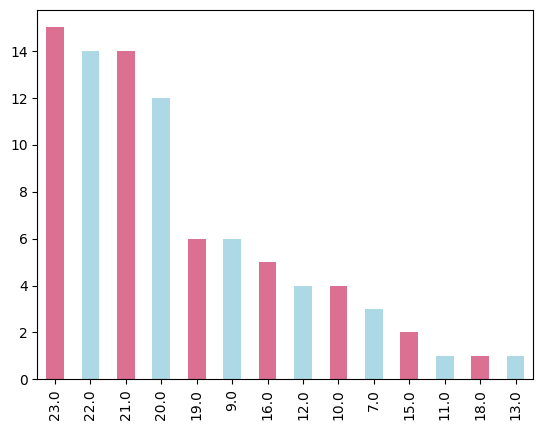

In [163]:
avgi_df2['hour'].value_counts().plot(kind='bar' , color=['palevioletred' , 'lightblue']) 

In [138]:
!python -m spacy download el_core_news_sm
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]


2023-05-30 20:52:12.035129: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 48.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


['πόσοι',
 'μονάχα',
 'υπό',
 'ετέραι',
 'οποίαν',
 'μολονότι',
 'ετούτοι',
 'λοιπά',
 'οσωνδήποτε',
 'μια',
 'είχατε',
 'τυχόν',
 'ξαφνικά',
 'ταύτη',
 'επίσης',
 'είχαν',
 'στη',
 'ήτοι',
 'όποιοι',
 'τίποτε']

In [155]:
avgi_df3 = avgi_df[['date','summary' , 'title' ]]

In [159]:
text = avgi_df3[(avgi_df2['day']==30.0) & (avgi_df3['summary'])]

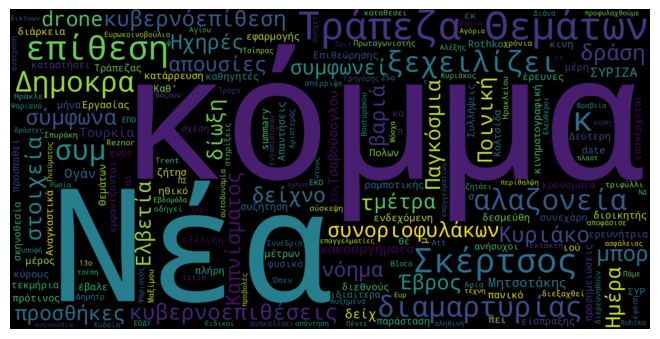

In [160]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(str(text))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

okayyy en telh den eixame to epithimito apotelesma nomizw?? kai giauto den exw na sxoliasw kati se 100 lekseis 
kai exw kourastei😭😭